# Descripción:

En este módulo no se tienen tareas perse, sino avances de los portafolios. El esquema de evaluación es basado en retroalimentación continua, por ello se tienen 2 entregas: una después de ver el tema donde el estudiante entrega su primer intento y se le da retroalimentación y una al final del bloque donde el estudiante puede entregar las correcciones de su entrega anterior y se le califica.

# Instrucciones:
**Entregable: Implementación de una técnica de aprendizaje máquina sin el uso de un framework.**

Selecciona uno de los dos primeros 'Challenge' vistos en clase (Week01_Challenge.pdf o Week02_Challenge1.pdf) y programa un algoritmo que permita resolver el problema. Dicho algoritmo debe ser uno de los algoritmos vistos en el módulo (o que tu profesor de módulo autorice), y no puedes usar ninguna biblioteca o framework de aprendizaje máquina, ni de estadística avanzada. Lo que se busca es que implementes manualmente el algoritmo, no que importes un algoritmo ya implementado.
Divide el set de datos del problema en dos subconjuntos, uno para entrenamiento y otro para prueba. Entrena tu modelo sobre el primer subconjunto, y por un mínimo de 100 iteraciones. Selecciona valores para la tasa de aprendizaje y para los parámetros iniciales, según tu criterio.
Prueba tu implementación. Para ello, utiliza el modelo entrenado para hacer predecir las salidas del subconjunto de prueba, y compara contra los datos reales en una gráfica.
Calcula el valor de la función de costo para el subconjunto de entrenamiento, y para el subconjunto de prueba.
Para facilitar la revisión, entrega dos archivos. El primero debe ser un Jupyter Notebook con todo el desarrollo (código comentado). El segundo debe ser un PDF del Jupyter Notebook. Para esto último, utiliza el comando nbconvert --to html para exportar el notebook a HTML y poder guardar el PDF más fácilmente (https://github.com/jupyter/nbconvert). Ten en cuenta que debes cargar tu directorio de Drive y dar la ruta al archivo, por lo que el comando completo sería:
!jupyter nbconvert --to html /content/drive/MyDrive/ColabNotebooks/archivo.ipynb
Después de la entrega intermedia se te darán correcciones que puedes incluir en tu entrega final.

*   Elemento de la lista
*   Elemento de la lista



Para este entregable se escogio el Challenge del week_02_Challenge1

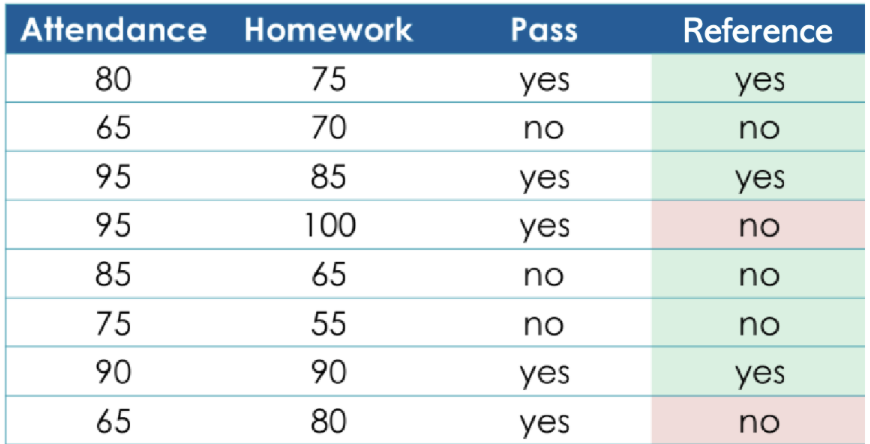

# Librerias
Se importan las librerias necesarias **texto en negrita**

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Función de regresión logistica, de costo y de hipotesis
se presenta una función de costo para actualizar los valores de th0 y th1

In [2]:
def log_loss(y_true, y_pred):
    # Evitar el logaritmo de cero agregando un pequeño valor epsilon.
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    # Cálculo del log-loss
    cost = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return cost



# Crear función lambda para la función de hipótesis
f = lambda th0 , th1, x : 1 / (1 + np.exp(-1*(th0+th1*x)))



def logistic_reg(iterations, th0, th1, alfa, x_arr, y_arr):
    n = x_arr.size
    delta0 = np.zeros(n)
    delta1 = np.zeros(n)
    cost_history = []

    for _ in range(iterations):

        # en cada iteración se calcula con los parametros correspondientes la predicción de y
        y_pred = np.array([f(th0, th1, x) for x in x_arr])


        for i in range(n):
            delta0[i] = f(th0, th1, x_arr[i]) - y_arr[i]
            delta1[i] = (f(th0, th1, x_arr[i]) - y_arr[i])*x_arr[i]

        th0 -= alfa * np.mean(delta0)
        th1 -= alfa * np.mean(delta1)

        # Calcular y almacenar la función de costo log-loss en cada iteración
        cost = log_loss(y_arr, y_pred)
        cost_history.append(cost)

    return th0, th1, cost_history

# Declaracion de variables

se declaran las variables y parametros para entrenar a el modelo.

In [3]:
#valores de x1
attendance = np.array([80,65,95,95,85,75,90,65])
#valores de x2
homework = np.array([75,70,85,100,65,55,90,80])
#valores de y
pass_ = np.array([1,0,1,1,0,0,1,1])


#vamos a dividir los datos para su posterior uso:

# División de datos

#division para attendance
attendance_train, attendance_test, pass_train_attendance, pass_test_attendance = train_test_split(attendance, pass_, test_size=0.5, random_state=60)

#division para homework
homework_train, homework_test, pass_train_homework, pass_test_homework = train_test_split(homework, pass_, test_size=0.5, random_state=78)



# Selección de parametros
En este caso, los parámetros del modelo se seleccionaron de manera arbitraria, lo que significa que no hubo un proceso estructurado o basado en una lógica estadística o matemática detrás de su elección. Esto implica que no se realizaron análisis previos sobre la influencia de los parámetros en el desempeño del modelo, ni se exploraron de manera exhaustiva técnicas como la validación cruzada,  o la búsqueda aleatoria (random search) para encontrar la mejor combinación de hiperparámetros.


In [4]:
#valores de theta 0 y theta 1 respectivamente
parametros = np.array([0.989,0.007], dtype= float)
#Valor del hiperparamtro alfa
alfa = 0.01

# Entrenar el modelo

se entrena el modelo insertando las variables y parametros en la función de costo


In [5]:
#entrenamos el modelo utilizando attendance primero

attendance_th0, attendance_th1, attendance_cost_history = logistic_reg(1000, parametros[0], parametros[1], alfa , attendance_train, pass_train_attendance)



#entrenamos el modelo utilizando homework despues

homework_th0, homework_th1, homework_cost_history = logistic_reg(1000, parametros[0], parametros[1], alfa , homework_train, pass_train_homework)





In [ ]:
print(attendance_th0, attendance_th1, attendance_cost_history)
print(homework_th0, homework_th1, homework_cost_history)

0.22315048847644303 -0.2863802209264763 [0.9297004512870488, 9.096867724263003, 10.054212012392309, 3.16688572006337, 14.243962791116417, 2.003729513154627, 13.651585839779377, 6.69748804966209, 7.714061948987093, 11.072266057785455, 1.8372104484599863, 13.921650600629125, 1.694591680619099, 13.626899411875431, 6.714976580905283, 7.689377007433107, 11.089744731462464, 1.8147763415837808, 13.882759114407552, 1.6576602321343208, 13.597889940766503, 6.735650612631643, 7.660369263173098, 11.110407784308299, 1.7885331664305566, 13.833879056186522, 1.6119254196451034, 13.551584299317497, 6.769069708466294, 7.614066352236072, 11.143807702002935, 1.7469413033135246, 13.749247082193474, 1.5334667324255127, 13.440808721144123, 6.849994999314849, 7.503297117091966, 11.224683099148283, 1.648970666382225, 13.511414058461266, 1.3204085910601344, 12.855651311021113, 7.280480211020365, 6.918172340979005, 11.654731431054223, 1.180560955570604, 11.147069711091795, 1.7408608973587347, 13.738535966674055,

# Cálculo de predicciones

In [6]:
# Función de hipótesis con los parámetros aprendidos
def predict(th0, th1, x):
    return 1 / (1 + np.exp(-1 * (th0 + th1 * x)))

# Calcular las predicciones para el conjunto de prueba

attendance_predictions = predict(attendance_th0, attendance_th1, attendance_test)

#como devuelve un valor entre 0 y 1 representativo de la probabilidad, vamos a convertirlo a un array booleano
# true si es mayor a un umbral de 0.5 y luevo convertir dicho valor a int
attendance_predictions = (attendance_predictions >= 0.5).astype(int)

homework_predictions = predict(homework_th0,  homework_th1, homework_test)

homework_predictions = ( homework_predictions >= 0.5).astype(int)



In [7]:
print(homework_predictions)
print(pass_test_homework)
print(attendance_predictions)
print(pass_test_attendance)



[1 1 1 1]
[1 0 1 1]
[0 0 0 0]
[0 1 1 1]


# Gráfico de comparación de resultados

primero se hará la gráfica para attendance

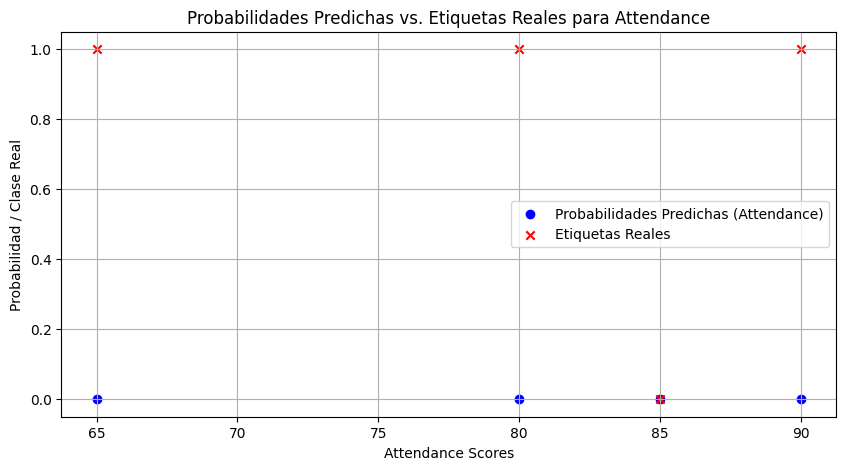

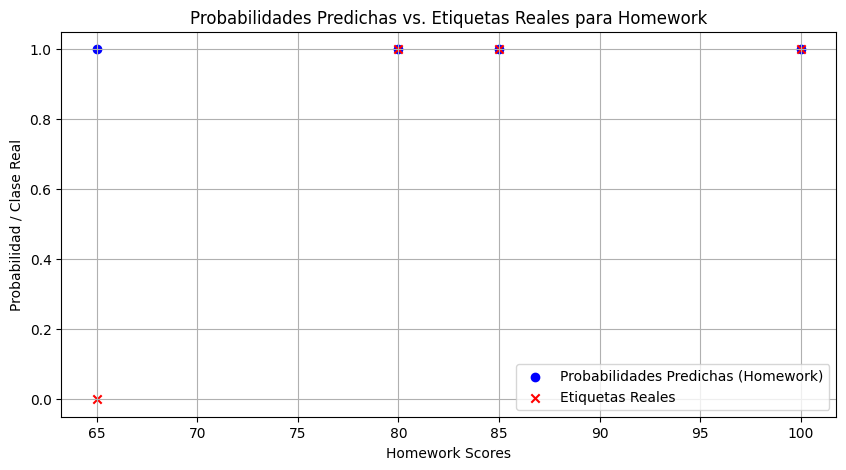

In [8]:
# Graficar probabilidades predichas vs etiquetas reales para 'attendance'
plt.figure(figsize=(10, 5))
plt.scatter(attendance_test, attendance_predictions, color='blue', label='Probabilidades Predichas (Attendance)')
plt.scatter(attendance_test, pass_test_attendance, color='red', marker='x', label='Etiquetas Reales')
plt.title('Probabilidades Predichas vs. Etiquetas Reales para Attendance')
plt.xlabel('Attendance Scores')
plt.ylabel('Probabilidad / Clase Real')
plt.legend()
plt.grid(True)
plt.show()

# Graficar probabilidades predichas vs etiquetas reales para 'homework'
plt.figure(figsize=(10, 5))
plt.scatter(homework_test, homework_predictions, color='blue', label='Probabilidades Predichas (Homework)')
plt.scatter(homework_test, pass_test_homework, color='red', marker='x', label='Etiquetas Reales')
plt.title('Probabilidades Predichas vs. Etiquetas Reales para Homework')
plt.xlabel('Homework Scores')
plt.ylabel('Probabilidad / Clase Real')
plt.legend()
plt.grid(True)
plt.show()


Se tienen que calcular las metricas de desempeño: accuracy, precision, recall y F1.

# Cálculo de función de costo para subconjunto de entrenamiento, y para el subconjunto de prueba.


para Attendance:

prueba

In [9]:
print(log_loss(pass_test_attendance, attendance_predictions))

25.904082296183013


entrenamiento

In [10]:
#como los de prueba tienen un tamaño diferente no se podrá calcular correctamente por lo que debemos escoger
#aleatoriamente dos elementos del subconjunton

print(log_loss(pass_train_attendance, attendance_predictions))

17.269388197455342


para Homework:

prueba

In [11]:
print(log_loss(pass_test_homework, homework_predictions))

8.63489399808522


entrenamiento

In [12]:

print(log_loss(pass_train_homework, homework_predictions))

17.26978799617044


# Conclusiones

el modelo no predice con la suficiente exactitud si los estudiantes pasarán dependiendo de su asistencia y las tareas, se supone que la limitación proviene de el tamaño del dataset, ya que no son suficientes para poder entrenarlo adecuadamente, si parece que tiene un sesgo es posible cambiar la semilla en la separación de datos para poder obtener resultados menos sesgados.